# Project: Gun data analysis 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The purpose of this project is to analyze U.S. gun sales/permits against census data. Two data sets were used:

>The data comes from the FBI's National Instant Criminal Background Check System. The NICS is used by to determine whether a    prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does  not have a criminal record or isn’t otherwise ineligible to make a purchase. 

>The second data set is from the U.S. census data which contains several variables at the state level. Most variables just have one data point per state (From 2010 - 2016), but a few have data for more than one year.

### Questions to address:
    1.- What is the state associated with more handguns?
    2.- Which states have had the higest number of gun permits and permit checks?
    3.- What is the overall trend of gun purchases?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [2]:
df = pd.read_csv('project2gun_data.csv')
df.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [3]:
df.shape

(12485, 27)

In [4]:
df.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [5]:
df.duplicated().sum()

0

### Steps for data wrangling
   >  Read my file and start looking at its content.
   >  I wanted to know how big it is the file. I want to know how much data is in (columns/rows).
   >  I wanted to see my statistical results. I need just an idea.
   >  And Identified if there are duplicates in the data. There are not duplicates but this is due to there are different dates       of data for one states.

<a id='eda'></a>
## Exploratory Data Analysis

> **Some of the data had to be sorted when answering the question**

### 1 What is the state associated with more handguns?

In [6]:
df_new = df[["state","handgun"]].groupby("state").sum().reset_index()

,state,handgun
0,Alabama,2222037.0
1,Alaska,434602.0
2,Arizona,1781468.0
3,Arkansas,965584.0
4,California,5910880.0
5,Colorado,2528422.0
6,Connecticut,879260.0
7,Delaware,208109.0
8,District of Columbia,4570.0
9,Florida,5909952.0


I wanted to group per state the total of handguns

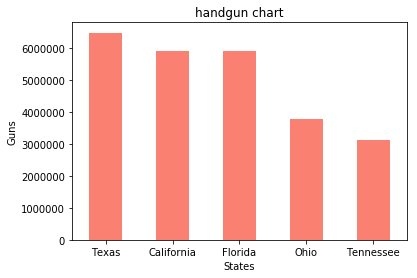

In [43]:
df_new = df_new.sort_values(by=['handgun'], ascending = False)
ax = df_new[:5].plot.bar(x = 'state', y = 'handgun', rot=0, title = 'handgun chart', color = 'salmon', legend = None);
ax.set_ylabel("Guns");
ax.set_xlabel("States");

I wanted to plot the findings with the highest 5 states to have a better look of the chart, where we can see that Texas is the state with more handguns.

###  2  Which states have had the higest number of gun permits and permit rechecks?

In [9]:
df_permit = df[["state","permit"]].groupby("state").sum().reset_index() 

I wanted to group from all the different dates given to each state the total of permits

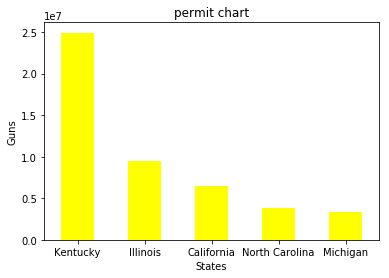

In [44]:
df_permit = df_permit.sort_values(by=['permit'], ascending = False)
ax = df_permit[:5].plot.bar(x='state', y='permit', rot=0, title = 'permit chart', color = 'yellow', legend = None);
ax.set_ylabel("Guns");
ax.set_xlabel("States");

I wanted to see it in a plot to have a better idea of which ones are the 5 states with more permits

In [11]:
df_permit_recheck = df[["state","permit_recheck"]].groupby("state").sum().reset_index()

I wanted to group all permit rechecks also from each data given of each state

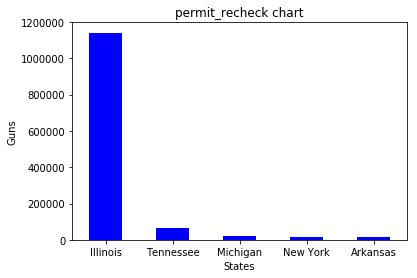

In [45]:
df_permit_recheck = df_permit_recheck.sort_values(by=['permit_recheck'], ascending = False)
ax = df_permit_recheck[:5].plot.bar(x='state', y='permit_recheck', rot=0, title = 'permit_recheck chart', color = 'blue', legend = None);
ax.set_ylabel("Guns");
ax.set_xlabel("States");

I wanted to plot the findings

### Research Question 3  What is the overall trend of gun purchases?

In [13]:
df_total = df[["state", "handgun", "long_gun", "other"]].groupby("state").sum().reset_index()
df_total = df_total.sort_values(by=['handgun', 'long_gun', 'other'], ascending = False)
df_total.head(5)

,state,handgun,long_gun,other
46,Texas,6493832.0,7651396.0,193465.0
4,California,5910880.0,5936770.0,342635.0
9,Florida,5909952.0,3829090.0,153326.0
37,Ohio,3791457.0,3646325.0,105327.0
45,Tennessee,3117004.0,2866345.0,16151.0


I wanted to know which columns I had related to gun purchases.Also I wanted to know which states has the most of these type of guns.

In [14]:
import datetime
from datetime import datetime as datet
df_Texas = df[df.state=='Texas']
df_Texas = df_Texas.sort_values(by=['month'],ascending = True)

I am focusing on the top 5 of these states to figure out their gun trend and the first is Texas.
I want to get the last 5 states arrange in cronologically order to plot the trend

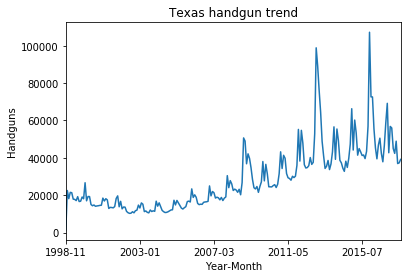

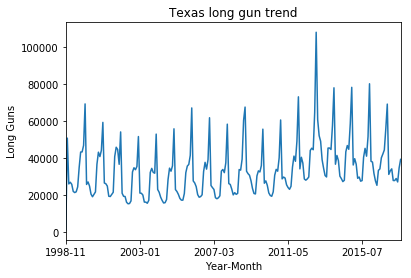

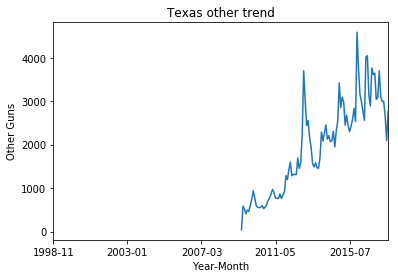

In [51]:
ax1 = df_Texas.plot(x = 'month', y = 'handgun', title ='Texas handgun trend', legend = None)
ax2 = df_Texas.plot(x = 'month', y = 'long_gun', title ='Texas long gun trend', legend = None)
ax3 = df_Texas.plot(x = 'month', y = 'other', title ='Texas other trend', legend = None);
ax1.set_ylabel("Handguns");
ax1.set_xlabel("Year-Month");
ax2.set_ylabel("Long Guns");
ax2.set_xlabel("Year-Month");
ax3.set_ylabel("Other Guns");
ax3.set_xlabel("Year-Month");

I want to get the California data in cronological order to plot the trend. We can see from this plots that handguns and other guns have been incresing over the years. Although they have a slight pick down in the last years from this range of time.

In [16]:
df_California = df[df.state=='California']
df_California = df_California.sort_values(by=['month'],ascending = True)

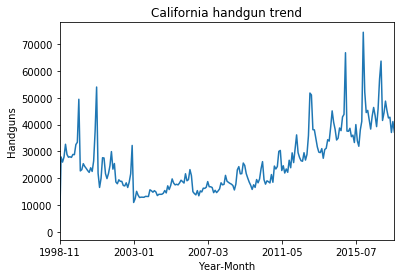

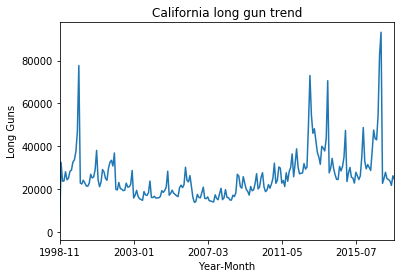

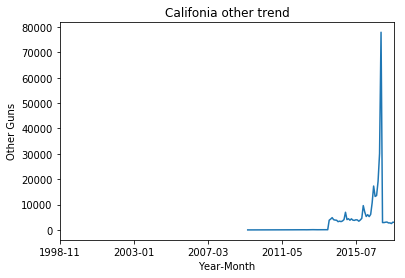

In [52]:
ax1 = df_California.plot(x = 'month', y = 'handgun', title ='California handgun trend', legend = None);
ax2 = df_California.plot(x = 'month', y = 'long_gun', title ='California long gun trend', legend = None);
ax3 = df_California.plot(x = 'month', y = 'other', title ='Califonia other trend', legend = None);
ax1.set_ylabel("Handguns");
ax1.set_xlabel("Year-Month");
ax2.set_ylabel("Long Guns");
ax2.set_xlabel("Year-Month");
ax3.set_ylabel("Other Guns");
ax3.set_xlabel("Year-Month");

I want to get the California data in cronological order to plot the trend. We can see how the handguns have been incresing over he time and how long guns were significally decresing. 

In [18]:
df_Florida = df[df.state=='Florida']
df_Florida = df_Florida.sort_values(by=['month'],ascending = True)

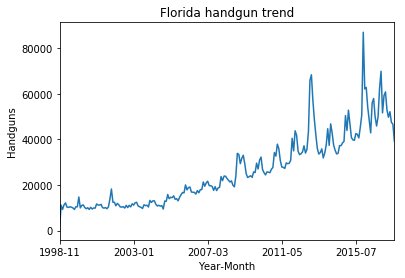

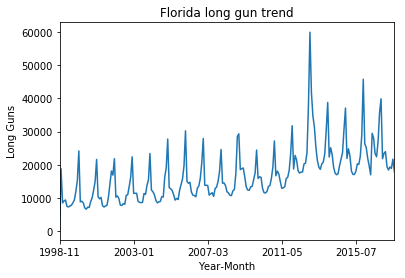

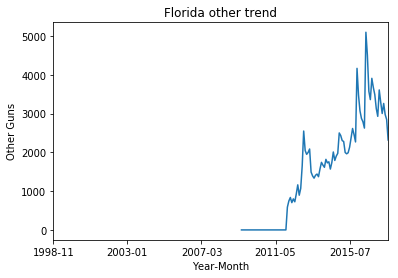

In [53]:
ax1 = df_Florida.plot(x = 'month', y = 'handgun', title ='Florida handgun trend', legend = None);
ax2 = df_Florida.plot(x = 'month', y = 'long_gun', title ='Florida long gun trend', legend = None);
ax3 = df_Florida.plot(x = 'month', y = 'other', title ='Florida other trend', legend = None);
ax1.set_ylabel("Handguns");
ax1.set_xlabel("Year-Month");
ax2.set_ylabel("Long Guns");
ax2.set_xlabel("Year-Month");
ax3.set_ylabel("Other Guns");
ax3.set_xlabel("Year-Month");

From these plots we can see that Florida had a steady increase in handguns and long guns. Despite the lack of data from the other guns, we can still see an increase in the plot. 

In [20]:
df_Ohio = df[df.state=='Ohio']
df_Ohio = df_Ohio.sort_values(by=['month'],ascending = True)

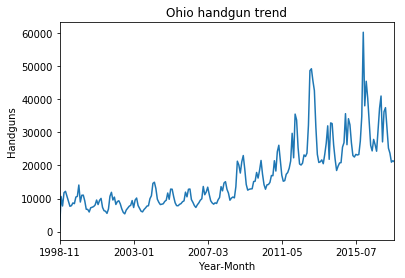

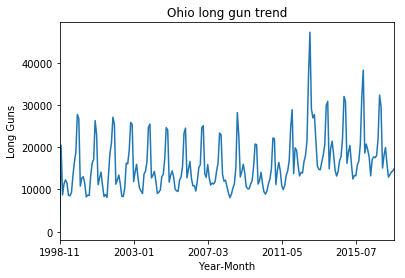

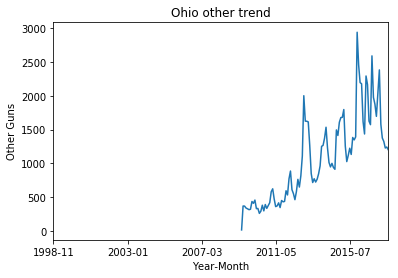

In [54]:
ax1 = df_Ohio.plot(x = 'month', y = 'handgun', title ='Ohio handgun trend', legend = None);
ax2 = df_Ohio.plot(x = 'month', y = 'long_gun', title ='Ohio long gun trend', legend = None);
ax3 = df_Ohio.plot(x = 'month', y = 'other', title ='Ohio other trend', legend = None);
ax1.set_ylabel("Handguns");
ax1.set_xlabel("Year-Month");
ax2.set_ylabel("Long Guns");
ax2.set_xlabel("Year-Month");
ax3.set_ylabel("Other Guns");
ax3.set_xlabel("Year-Month");

From these plots we can see that Ohio had a very similar trend as Florida with a steady increase in handguns and long guns. Also, despite the lack of data from the other guns, we can still see an increase in the plot. 

In [22]:
df_Tennessee = df[df.state=='Tennessee']
df_Tennessee = df_Tennessee.sort_values(by=['month'],ascending = True)

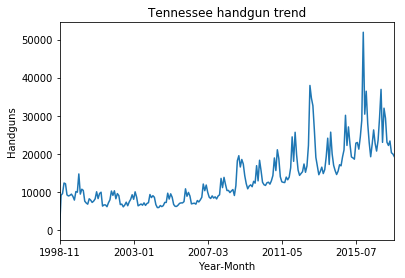

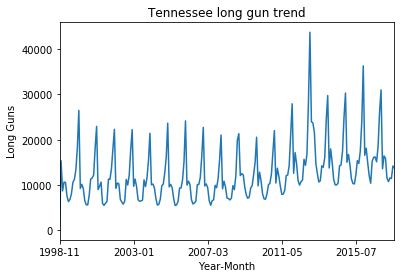

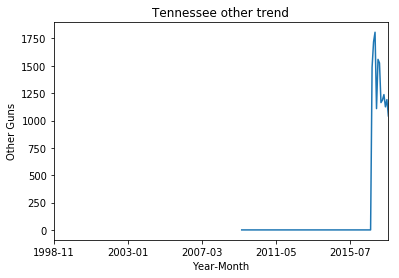

In [55]:
ax1 = df_Tennessee.plot(x = 'month', y = 'handgun', title ='Tennessee handgun trend', legend = None);
ax2 = df_Tennessee.plot(x = 'month', y = 'long_gun', title ='Tennessee long gun trend', legend = None);
ax3 = df_Tennessee.plot(x = 'month', y = 'other', title ='Tennessee other trend', legend = None);
ax1.set_ylabel("Handguns");
ax1.set_xlabel("Year-Month");
ax2.set_ylabel("Long Guns");
ax2.set_xlabel("Year-Month");
ax3.set_ylabel("Other Guns");
ax3.set_xlabel("Year-Month"); 

From these plots we can see that Tennessee had a very similar trend as Ohio and Florida with a steady increase in handguns and long guns. Also, despite the lack of data from the other guns, we can still see an increase in the plot. 

<a id='conclusions'></a>
## Conclusions

## Response 1
Texas was the state that from the given months had more than 6 millions handguns.'It is interesting to find out that California and Florida are the next states that have more handguns. They both have the same amount of 5,909,952 each.'

## Response 2
Kentucky is the head of the list for more gun permits issue, they have 24,926,779 permits in the given period. It is important to see that the next state is more than 15 millios of gun permits. This next state is Illinois which is the head of the permit recheck with 11 millions rechecks. The next state following the lead of Illinois is Tennessee with almost have of the amount of Illinois. In conclusion Kentucky has issued almost 25 millions permits and Illinois had 11 millions of permit rechecks.'

## Response 3
On handguns Texas has the lead increasing since about 2003. Texas has also the lead on long guns with an increase since 2011. California has the lead on other guns with an spike increase in 2015. 

#### LIMITATIONS

There are several missing numbers but since the data represents different months, it is not possible to fix this problem. Trying to fix it, would probably give a false conclusion.

Some of the columns such as Other guns have insuficient data to visualize the trends of purchase. 
